# NLP I. - Word Embeddings

Natural Language Processing is the part of artificial intelligence (AI) that enables computers to **understand, interpret, and generate human language**. It allows machines to interact with humans in a natural way. Some example for NLP tasks:

* Speech recognition (e.g., voice assistants like Siri, Alexa)
* Text analysis (e.g., sentiment analysis)
* Machine translation (e.g., Google Translate)
* Chatbots and virtual assistants (e.g., ChatGPT)
* Information retrieval (e.g., search engines)
* Summarization and text generation

## 1. Text preprocessing

Depending on the task (we will see examples later in `NLP III. - Text Classification`) there are several preprocessing steps that we can consider. In this section we will explore some techniques.

**Lowercasing**

Convert all text to lowercase to ensure consistency (e.g., "Dog" -> "dog")

In [1]:
text = "The quick brown Fox jumped over the lazy dog."  # TODO: Ha tulajdonnevek? Előbb NER
text.lower()

'the quick brown fox jumped over the lazy dog.'

**Tokenization**

Split text into words or subwords (e.g., "The lazy dog" -> ["The", "lazy", "dog"]). Using tokens instead of whole words is often beneficial, especially in cases like:

* Handle rare words: many words have prefixes, suffixes, or variations ("running", "runs", "runner") and some are completely out-of-vocabulary (OOV) so the model haven't seen them before during training
* Reduce vocabulary size: e.g. Word-based: "talking", "talked", "talks" -> 3 separate words. Subword-based: "talk" + "ing", "ed", "s".


In [2]:
import spacy  # NLP library
nlp = spacy.load("en_core_web_sm")

doc = nlp("The quick brown fox jumped over the lazy dog.")

token_0 = doc[0]
token_1 = doc[1]
token_2 = doc[2]
token_3 = doc[3]
token_last = doc[-1]

token_0, token_1, token_2, token_3, token_last

2025-03-16 18:43:23.545922: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 18:43:23.573697: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-16 18:43:23.573775: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-16 18:43:23.573828: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-16 18:43:23.580674: I tensorflow/core/platform/cpu_feature_g

(The, quick, brown, fox, .)

Tokens are sometimes different from whole words and may not always carry a complete meaning on their own.

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp("Don't hesitate. It isn't that bad. It's amazing!")
tokens = [token for token in doc]  # TODO: Show token.text

print(tokens)

[Do, n't, hesitate, ., It, is, n't, that, bad, ., It, 's, amazing, !]


The tokenizer of the BERT LMM (more details on it in `NLP IV. - Pre-trained NLP Models`).

In [4]:
from transformers import BertTokenizer  # Deeplearning library

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
text = "Don't hesitate. It isn't that bad. It's amazing!"

tokens = tokenizer.tokenize(text)
print(tokens)

['don', "'", 't', 'hesitate', '.', 'it', 'isn', "'", 't', 'that', 'bad', '.', 'it', "'", 's', 'amazing', '!']


**Removing punctuation**

Remove characters like .,!?; to focus on words (e.g., "Hello!" -> "Hello"). We often use Regex for this purpose.

Regex (short for Regular Expressions) is a tool for pattern matching. It allows you to search, match, and manipulate strings using specific patterns. Usually used in data cleaning, text extraction, and NLP preprocessing.

Basic examples:

* Match specific characters: e.g. [aeiou] matches any lowercase vowel
* Match digits: \d
* Match alphanumeric + underscore: \w
* Match whitespace: \s

[More details.](https://web.stanford.edu/~jurafsky/slp3/2.pdf)

In [5]:
import re  # Regular expressions

text = """Hello, my email is example@email.com!
This is another email: example01.example.email@gmail.com. And this is another: example@inf.elte.hu"""

pattern = r'e'  # TODO: Show e, email, email\. `email_patter`
matches = re.findall(pattern, text)

# Basic pattern to match email addresses
email_patter = r'[a-z0-9\._]+@[a-z0-9\.-]+\.[a-zA-Z]{2,}'  # TODO: Show adding % to pattern and see difference
emails = re.findall(email_patter, text)

emails
print(matches)

['e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e']


In [6]:
import re

text = "Hello!!! How are you??"
pattern = r'[^\w\s]'
re.sub(pattern, '', text)

'Hello How are you'

**Removing stopwords**

Eliminate common words like "the", "is", "and" that don’t add much meaning. Less is sometimes more! We may lose some words but it can help to focus on the important parts.

In [7]:
try:
    from nltk.corpus import stopwords
    stopwords.words("english")
except LookupError:
    import nltk
    nltk.download('stopwords')

In [8]:
# With NLTK
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
text = "The quick brown fox jumped over the lazy dog."
# text = text.lower()

filtered_words = [word for word in text.split() if word not in stop_words]
" ".join(filtered_words)

'The quick brown fox jumped lazy dog.'

In [9]:
# With Spacy
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("The quick brown fox jumped over the lazy dog.")
filtered_words = [token.text for token in doc if not token.is_stop]

" ".join(filtered_words)

'quick brown fox jumped lazy dog .'

**Stemming/lemmatization**

Reduce words to their root forms (e.g., "running" -> "run", "better" -> "well")

In [10]:
# Stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem("running"))
print(stemmer.stem("better"))
print(stemmer.stem("feet"))

run
better
feet


In [11]:
# Lemmatization
doc = nlp("running better feet")
lemmas = [token.lemma_ for token in doc]

print(lemmas)

['run', 'well', 'foot']


**Spelling correction**

Fix misspellings to standardize text (e.g., "recieve" -> "receive")

In [12]:
from textblob import TextBlob

text_1 = "Who are yuo?"
text_2 = "Yuo are in the house"

true_positive = str(TextBlob(text_1).correct())
false_positive = str(TextBlob(text_2).correct())

print(true_positive)
print(false_positive)

Who are you?
To are in the house


## 2. Embeddings

How can computers understand human language? 

**Convert Words to Numbers?**

1. Let's assume we have a text (usually a lot longer than this): `"The quick brown fox jumped over the lazy dog."`. 
2. Normalize the text, e.g. convert to lowercase, split into smaller parts (like words): `["the", "quick", "brown", "fox", "jumped", "over", "the", "lazy", "dog",  "."]`
3. Collect the unique words to form the `vocabulary` of the text and give an id to each word:

| Words: | brown | dog | fox | jumped | lazy | over | quick | the |  .  |
| :----- | :---: | :-: | :-: | :----: | :--: | :--: | :-:   | :-: | :-: |
| Ids:   | 0     | 1   | 2   | 3      | 4    | 5    | 6     | 7   | 8   |

4. Now we can convert the whole text to a list of numbers:\
   `"the quick brown fox jumped over the lazy dog."` -> `[7, 6, 0, 2, 3, 5, 7, 4, 1, 8]`


What is the problem with this? If we want to perform mathematical operations we can't preserve semantical meaning: \
`"dog" + "dog" = 1 + 1 = 2 = "fox"` \
In neural networks this would lead to incorrect associations and poor learning.

**Convert Words to Vectors!**

The most primitive way is one-hot encoding. We get an all-zero vector, where the length of the vector equals to the length of the vocabulary (9 in this case) and at the id of the word we change the 0 to 1.

```
brown = [1, 0, 0, 0, 0, 0, 0, 0, 0]
lazy = [0, 0, 0, 0, 1, 0, 0, 0, 0]
```

We still can't capture any semantic meaning with this kind of representation but it will be useful when we try to learn dense embeddings.

<img src="../img/01_embeddings/vectors.png" width="400">

**KING** - **MAN** + **WOMAN** = (16, 8) - (5, 14) + (7, 11) = (16-5+7, 8-14+11) = (18, 5) ≈ (17, 5) = **QUEEN**

An embedding is a numerical representation of data in a lower-dimensional space, capturing meaningful relationships. A word embedding is a dense vector representation of words, where similar words have similar vector values.

In [13]:
import torch

king = torch.tensor([16, 8])
man = torch.tensor([5, 14])
woman = torch.tensor([7, 11])
queen = torch.tensor([17, 5])

queen_ = king - man + woman
queen_

tensor([18,  5])

In [14]:
diff = abs(queen - queen_)
diff

tensor([1, 0])

Two common approaches to define some kind of similarity or dissimilarity between the vectors are Euclidean distance and cosine similarity.

In [13]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("The quick brown fox jumped over the lazy dog.")

fox = doc[3]
dog = doc[8]
quick = doc[1]

print(fox.text)
print(fox.vector.shape)

fox.vector[:10]

2025-03-16 21:38:38.592822: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 21:38:38.618020: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-16 21:38:38.618054: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-16 21:38:38.618165: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-16 21:38:38.623150: I tensorflow/core/platform/cpu_feature_g

fox
(96,)


array([ 0.00406499, -0.35175443, -0.18060684,  0.51963633,  0.73808855,
        0.5136386 ,  2.8315334 ,  0.534479  ,  0.09457049, -0.50143874],
      dtype=float32)

**Euclidean Distance** measures the straight-line distance between two points. A smaller Euclidean distance indicates greater similarity, while a larger distance suggests more dissimilarity. It is computed as:

$d_{\text{euclidean}}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum_{i=1}^{n} (A_i - B_i)^2} = \| \mathbf{A} - \mathbf{B} \|_2$

In [14]:
import torch
import numpy as np

def euclidean_distance(A: torch.Tensor | np.ndarray, B: torch.Tensor | np.ndarray) -> float:
    tmp = (A - B)**2
    return tmp.sum()**0.5

print(euclidean_distance(fox.vector, dog.vector))
print(euclidean_distance(quick.vector, dog.vector))
print(euclidean_distance(fox.vector, quick.vector))

6.686166790843649
10.18951208921266
9.204851645911639


**Cosine Similarity**, on the other hand, measures the angle between two vectors. It ranges from **-1 (opposite directions)** to **1 (identical directions)**, with **0 indicating orthogonality (no similarity)**. It is calculated as:  

$\text{sim}_{\cos}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|_2 \, \|\mathbf{B}\|_2}$  

where $\mathbf{A} \cdot \mathbf{B}$ is the dot-product of the two vectors. This is the more common method.

In [ ]:
import torch
import numpy as np

def cosine_similarity(A: torch.Tensor | np.ndarray, B: torch.Tensor | np.ndarray) -> float:
    A_len = (A * A).sum()**0.5
    B_len = (B * B).sum()**0.5

    dot_product = (A * B).sum()
    sim = dot_product / (A_len * B_len)
    
    return sim.item() if isinstance(sim, torch.Tensor) else sim

print(cosine_similarity(fox.vector, dog.vector))
print(cosine_similarity(quick.vector, dog.vector))
print(cosine_similarity(fox.vector, quick.vector))

0.5557672644400622
0.08589619160309067
0.2363222884469598


In [18]:
import torch

king = torch.tensor([16, 8])
man = torch.tensor([5, 14])
woman = torch.tensor([7, 11])
queen = torch.tensor([17, 5])

print(cosine_similarity(king, queen))
print(cosine_similarity(king, man))

0.9842711687088013
0.7219881415367126


## 3. Methods to Learn Embeddings

**Word2Vec**

In Word2Vec we use neural networks (NN) to learn word embeddings. We assume that similar words occur in similar contexts (the surrounding words) this is what we will use during the training. There are two approaches for the training: 

**Skip-Gram**: predict a word's context from the target word
* Training dataset: We form pairs of (target, context) words for each words in the text and for each surrounding words ($\pm$ window size) in the context window.
* The input of the network is a word in the one-hot encoded form of the target word.
* The output layer is a probability distribution over the vocabulary.
* The label is the one-hot encoded vector of the context word.
* In the NN there is one hidden layer this will be our learned embeddings so it has the size of the desired embedding dimension.

<img src="../img/01_embeddings/skipgram.png" width="400">

### Dataset

In [2]:
import re
from collections import Counter
from nltk.corpus import stopwords


class SkipGramDataCreator:
    def __init__(self, text_path: str, window_size: int, threshold: int = 4) -> None:
        """
        
        """
        self.text_path = text_path
        self.window_size = window_size
        self.threshold = threshold

        self.unk = "<UNK>"
        self.stopwords = set(stopwords.words("english"))

        # Read data
        with open(self.text_path, 'r') as file:
            self.text = file.read().strip()

        # Preprocess data
        self.tokens = self.preprocess_text(self.text)
        self.length = len(self.tokens)

        # Vocabulary
        # Keep only those words for the vocabulary that occur at least `threshold` times
        frequencies = Counter(self.tokens)
        self.vocab = {}

        id = 0
        for word, freq in frequencies.items():
            if freq >= self.threshold:
                self.vocab[word] = id
                id += 1

        self.vocab[self.unk] = len(self.vocab)

        self.reverse_vocab = {i: word for word, i in self.vocab.items()}
        self.unk_id = self.vocab[self.unk]

        self.token_ids = [self.vocab.get(token, self.unk_id) for token in self.tokens]
    
    def preprocess_text(self, text: str) -> list[str]:
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and non-alphabetical characters
        tokens = text.split()  # We could use a more sophisticated tokenizer instead

        tokens = [token for token in tokens if token not in self.stopwords]

        return tokens
    
    def get_pairs(self) -> torch.Tensor:
        context_pairs = []

        for target_inx, target_id in enumerate(self.token_ids):
            context = [
                self.vocab.get(self.tokens[j], self.unk_id) for j in self.get_range(target_inx)
                if j != target_inx  # Don't include the target itself
            ]
            
            context_pairs.extend([(target_id, context_ids) for context_ids in context])
        
        return torch.tensor(context_pairs)

    def get_range(self, i: int) -> range:
        """
        returns: The index list of surrounding tokens including the target index
        """
        lower = max(0, i - self.window_size)
        upper = min(self.length-1, i + self.window_size)

        return range(lower, upper+1)
    
    def get_vocab_size(self) -> int:
        return len(self.vocab)


In [4]:
import os

text_path = os.path.join("..", "data", "shakespeare.txt")  # Shakespeare: THE TRAGEDY OF ROMEO AND JULIET 

In [5]:
from torch.utils.data import DataLoader

data_creator = SkipGramDataCreator(text_path, window_size=3, threshold=4)
dataset = data_creator.get_pairs()

batch_size = len(dataset)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

### Skip-Gram Model

In [6]:
import torch.nn as nn

class SkipGramModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGramModel, self).__init__()
        vocab_size = vocab_size
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.output_layer = nn.Linear(embedding_dim, vocab_size)

    def forward(self, input_ids):
        embedded = self.word_embeddings(input_ids)
        hidden = self.output_layer(embedded)
        # TODO: No softmax here because of CrossEntropy

        return hidden


### Training

In [7]:
import torch.optim as optim

embedding_dim = 10

model = SkipGramModel(
    vocab_size=data_creator.get_vocab_size(), 
    embedding_dim=embedding_dim
    )

# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training loop
epochs = 100
model.train()
for epoch in range(epochs):
    for batch in dataloader:
        model.zero_grad()

        inputs = batch[:, 0]
        labels = batch[:, 1]

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")


Epoch 10/100, Loss: 5.042764186859131
Epoch 20/100, Loss: 4.856534957885742
Epoch 30/100, Loss: 4.7528181076049805
Epoch 40/100, Loss: 4.690615177154541
Epoch 50/100, Loss: 4.652451038360596
Epoch 60/100, Loss: 4.628993988037109
Epoch 70/100, Loss: 4.613498210906982
Epoch 80/100, Loss: 4.602985382080078
Epoch 90/100, Loss: 4.595461845397949
Epoch 100/100, Loss: 4.589747428894043


### Results

In [9]:
def get_embedding(word, vocab, model):
    if word in vocab:
        idx = torch.tensor(vocab[word])
        return model.word_embeddings(idx).detach().cpu().numpy()
    else:
        return None

romeo_vector = get_embedding("romeo", data_creator.vocab, model)
juliet_vector = get_embedding("juliet", data_creator.vocab, model)
montague_vector = get_embedding("montague", data_creator.vocab, model)
capulet_vector = get_embedding("capulet", data_creator.vocab, model)
house_vector = get_embedding("house", data_creator.vocab, model)


vectors = [
    romeo_vector,
    juliet_vector,
    montague_vector,
    capulet_vector,
    house_vector
]

labels = [
    "romeo",
    "juliet",
    "montague",
    "capulet",
    "house"
]


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_similarities(vectors):
    # Compute similarities
    similarities = []

    for v1 in vectors:
        tmp = []
        for v2 in vectors:
            similarity = cosine_similarity(v1, v2)
            tmp.append(round(similarity, 2))

        similarities.append(tmp)

    # Plot matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(similarities, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Cosine Similarity Scores")
    plt.show()

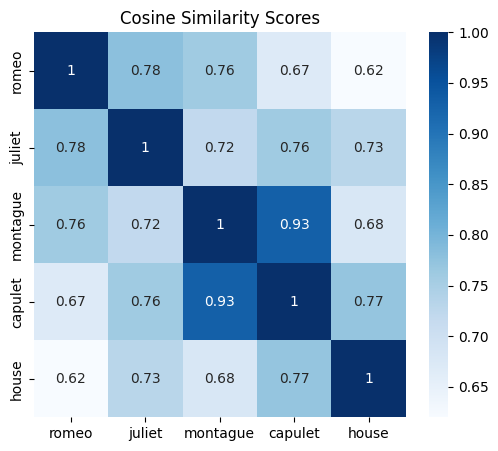

In [16]:
plot_similarities(vectors)

Skip-Gram has another variation, **skip-gram with negative sampling (SGNS)**:

1. Treat the target word and the neighboring context words as positive examples.
2. Randomly sample other words from the vocabulary to get negative samples.
3. Train a binary classifier to distinguish those two cases (labels: positive, negative).
4. Use the learned weights as the embeddings.

[source](https://web.stanford.edu/~jurafsky/slp3/6.pdf)

**Continuous Bag of Words (CBOW)**: predicts the target word using the context.

Similar to Skip-Gram. The input of the model consists of the context words: we sum the one-hot encoded vectors of the context words to encode the whole context e.g.

The target word is "fox" and the window size is 2:

```
text = "the quick brown fox jumped over the lazy dog."
context_1 = [1, 0, 0, 0, 0, 0, 0, 0, 0]
context_2 = [0, 1, 0, 0, 0, 0, 0, 0, 0]
context_3 = [0, 0, 0, 1, 0, 0, 0, 0, 0]
context_4 = [0, 0, 0, 0, 1, 0, 0, 0, 0]

input = [1, 1, 0, 1, 1, 0, 0, 0, 0]
```

Then we try to predict the target word from it. Notice that this way we lose the positional information of the context, this is why we call it a bag of words.

**GloVe (Global Vectors for Word Representation)**

GloVE, just like word2vec is a method to produce dense word embeddings. The two approaches are quite similar:

1. Build a word co-occurrence matrix $X$:
     - Count how often words appear near each other in a context window (e.g., 3 words before & after). Here $X_{ij}$ represents how often word $i$ appears near word $j$ in the training text.
2. Factorize the matrix:
     - The goal is to find word vectors that approximate our matrix. If $w_i$ is the embedding vector for word $i$ and $w_j$ is the embedding vector for word $j$, then we want to find $w_i$ and $w_j$ vectors for each word $w_i^Tw_j\approx \log{X_{ij}}$.
     - Using logarithm helps normalize large count values.
3. Train with a loss function:
     - Use a weighted least-squares loss to optimize word embeddings.

### Dataset

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter


def build_cooccurrence_matrix(corpus, vocab_size=1000, window_size=2):
    words = corpus.split()
    word_counts = Counter(words)
    vocab = {word: i for i, (word, _) in enumerate(word_counts.most_common(vocab_size))}
    
    co_matrix = np.zeros((vocab_size, vocab_size))
    
    for i, word in enumerate(words):
        if word not in vocab:
            continue
        word_idx = vocab[word]
        for j in range(1, window_size + 1):
            if i - j >= 0 and words[i - j] in vocab:
                left_word_idx = vocab[words[i - j]]
                co_matrix[word_idx, left_word_idx] += 1
                co_matrix[left_word_idx, word_idx] += 1  # Symmetric
            if i + j < len(words) and words[i + j] in vocab:
                right_word_idx = vocab[words[i + j]]
                co_matrix[word_idx, right_word_idx] += 1
                co_matrix[right_word_idx, word_idx] += 1
    return co_matrix, vocab

text = data_creator.text.lower()
co_matrix, vocab = build_cooccurrence_matrix(text, vocab_size=700, window_size=3)

# Convert co-occurrence matrix to a tensor
X = torch.tensor(co_matrix, dtype=torch.float32)

### GloveModel

In [71]:
class GloveModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(GloveModel, self).__init__()
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.word_biases = nn.Embedding(vocab_size, 1)

        nn.init.xavier_uniform_(self.word_embeddings.weight)
        nn.init.zeros_(self.word_biases.weight)

        self.x_max = 100
        self.alpha = 3/4

    def forward(self, word_idx, context_idx, cooccurrence):
        w_i = self.word_embeddings(word_idx)
        w_j = self.word_embeddings(context_idx)
        b_i = self.word_biases(word_idx).squeeze()
        b_j = self.word_biases(context_idx).squeeze()

        # count weight factor
        weight_factor = torch.pow(cooccurrence / self.x_max, self.alpha)
        weight_factor[cooccurrence >= self.x_max] = 1

        embedding_products = torch.sum(w_i * w_j, dim=1)
        log_cooccurrences = torch.log(cooccurrence)

        distance_expr = (embedding_products + b_i + b_j - log_cooccurrences) ** 2

        single_losses = weight_factor * distance_expr
        sum_loss = torch.sum(single_losses)
        
        return sum_loss


### Train

In [80]:
glove_model = GloveModel(len(vocab), embedding_dim)
optimizer = optim.Adam(glove_model.parameters(), lr=0.01)

word_idx, context_idx = torch.nonzero(X, as_tuple=True)
cooccurrence = X[word_idx, context_idx]

epochs = 3000
for epoch in range(epochs):
    optimizer.zero_grad()
    loss = glove_model(word_idx, context_idx, cooccurrence)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/3000, Loss: 742.3696
Epoch 200/3000, Loss: 540.4493
Epoch 300/3000, Loss: 451.5533
Epoch 400/3000, Loss: 419.7794
Epoch 500/3000, Loss: 406.4346
Epoch 600/3000, Loss: 399.2756
Epoch 700/3000, Loss: 394.8073
Epoch 800/3000, Loss: 391.6045
Epoch 900/3000, Loss: 389.1096
Epoch 1000/3000, Loss: 387.0300
Epoch 1100/3000, Loss: 385.2926
Epoch 1200/3000, Loss: 383.8735
Epoch 1300/3000, Loss: 382.7365
Epoch 1400/3000, Loss: 381.8520
Epoch 1500/3000, Loss: 381.2031
Epoch 1600/3000, Loss: 380.7370
Epoch 1700/3000, Loss: 380.3843
Epoch 1800/3000, Loss: 380.0872
Epoch 1900/3000, Loss: 379.8094
Epoch 2000/3000, Loss: 379.5425
Epoch 2100/3000, Loss: 379.2983
Epoch 2200/3000, Loss: 379.0747
Epoch 2300/3000, Loss: 378.8663
Epoch 2400/3000, Loss: 378.6709
Epoch 2500/3000, Loss: 378.4887
Epoch 2600/3000, Loss: 378.3258
Epoch 2700/3000, Loss: 378.1803
Epoch 2800/3000, Loss: 378.0537
Epoch 2900/3000, Loss: 377.9504
Epoch 3000/3000, Loss: 377.8652


### Results

In [81]:
romeo_vector = get_embedding("romeo", vocab, glove_model)
juliet_vector = get_embedding("juliet", vocab, glove_model)
montague_vector = get_embedding("montague", vocab, glove_model)
capulet_vector = get_embedding("capulet", vocab, glove_model)
house_vector = get_embedding("house", vocab, glove_model)

vectors = [
    romeo_vector,
    juliet_vector,
    montague_vector,
    capulet_vector,
    house_vector
]

labels = [
    "romeo",
    "juliet",
    "montague",
    "capulet",
    "house"
]


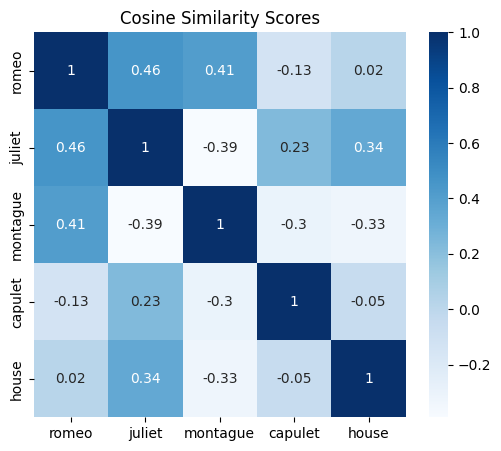

In [82]:
plot_similarities(vectors)